In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the ferry trips data
ferry_data = pd.read_csv('data/ferry_trips_data_large.csv')

# Display the first few rows to understand the structure
ferry_data.head()
# Summary of the dataset
#ferry_data.info()

,route_id,route_name,ferry_name,ferry_id,terminal_departure,terminal_arrival,time_departure,cars_outbound,trucks_outbound,trucks_with_trailer_outbound,...,passenger_car_equivalent_outbound,passenger_car_equivalent_inbound,fuelcons_outbound_l,distance_outbound_nm,start_time_outbound,end_time_outbound,fuelcons_inbound_l,distance_inbound_nm,start_time_inbound,end_time_inbound
0,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 05:44:00,6,0,0,...,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 06:04:00,4,0,0,...,4.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 06:24:00,8,1,0,...,10.5,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 06:44:00,5,1,0,...,7.5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 07:04:00,7,0,0,...,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q1 What is the total fuel cost for ferry Jupiter in January 2024 assuming that the price per liter is 20 sek?

In [36]:
# Convert 'time_departure' to datetime objects for filtering
ferry_data['time_departure'] = pd.to_datetime(ferry_data['time_departure'])

# Filter data for ferry 'Jupiter' and January 2024
jupiter_jan_data = ferry_data[
    (ferry_data['ferry_name'] == 'Jupiter') &
    (ferry_data['time_departure'].dt.month == 1) &
    (ferry_data['time_departure'].dt.year == 2024)
]

# Calculate total fuel consumption (handling potential NaNs by filling with 0)
total_fuel_consumption = (
    jupiter_jan_data['fuelcons_outbound_l'].fillna(0).sum() +
    jupiter_jan_data['fuelcons_inbound_l'].fillna(0).sum()
)

# Assuming a fuel cost per liter (you might need to adjust this)
# Let's assume a fuel cost of 10 SEK per liter for example purposes
fuel_cost_per_liter = 20

# Calculate the total fuel cost
total_fuel_cost = total_fuel_consumption * fuel_cost_per_liter

print(f"Total fuel consumption for ferry Jupiter in January 2024: {total_fuel_consumption:.2f} liters")
print(f"Total fuel cost for ferry Jupiter in January 2024: {total_fuel_cost:.2f} SEK")

Total fuel consumption for ferry Jupiter in January 2024: 12709.34 liters
Total fuel cost for ferry Jupiter in January 2024: 254186.70 SEK


## Q2 What is the average speed of ferry Jupiter? (in km/h)


In [37]:
# Convert time columns to datetime objects
ferry_data['start_time_outbound'] = pd.to_datetime(ferry_data['start_time_outbound'])
ferry_data['end_time_outbound'] = pd.to_datetime(ferry_data['end_time_outbound'])
ferry_data['start_time_inbound'] = pd.to_datetime(ferry_data['start_time_inbound'])
ferry_data['end_time_inbound'] = pd.to_datetime(ferry_data['end_time_inbound'])

# Filter data for ferry 'Jupiter'
jupiter_data = ferry_data[ferry_data['ferry_name'] == 'Jupiter'].copy()

# Function to calculate trip duration in hours, handling potential NaNs
def calculate_duration(start_time, end_time):
    if pd.notna(start_time) and pd.notna(end_time):
        duration = (end_time - start_time).total_seconds() / 3600
        return duration
    return None

# Apply the function to calculate outbound and inbound durations
jupiter_data['duration_outbound'] = jupiter_data.apply(
    lambda row: calculate_duration(row['start_time_outbound'], row['end_time_outbound']), axis=1
)
jupiter_data['duration_inbound'] = jupiter_data.apply(
    lambda row: calculate_duration(row['start_time_inbound'], row['end_time_inbound']), axis=1
)

# Calculate average speed for outbound trips (distance in nautical miles, duration in hours)
jupiter_data['speed_outbound_knots'] = jupiter_data.apply(
    lambda row: row['distance_outbound_nm'] / row['duration_outbound']
    if row['duration_outbound'] else None,
    axis=1
)

# Calculate average speed for inbound trips
jupiter_data['speed_inbound_knots'] = jupiter_data.apply(
    lambda row: row['distance_inbound_nm'] / row['duration_inbound']
    if row['duration_inbound'] else None,
    axis=1
)

# Calculate the average of all valid speed values
valid_speeds = pd.concat([jupiter_data['speed_outbound_knots'].dropna(), jupiter_data['speed_inbound_knots'].dropna()])

if not valid_speeds.empty:
    average_speed_knots = valid_speeds.mean()
    print(f"The average speed of ferry Jupiter is: {average_speed_knots:.2f} knots")

    # Convert knots to km/h and mph for better understanding
    average_speed_kmh = average_speed_knots * 1.852
    average_speed_mph = average_speed_knots * 1.15078
    print(f"Average speed in km/h: {average_speed_kmh:.2f} km/h")
    print(f"Average speed in mph: {average_speed_mph:.2f} mph")
else:
    print("Could not calculate the average speed for ferry Jupiter due to missing distance or time information.")

The average speed of ferry Jupiter is: 6.23 knots
Average speed in km/h: 11.55 km/h
Average speed in mph: 7.17 mph


## Q3 How many vehicles left at the terminal are there in total? 

In [38]:
# Total vehicles left at the terminal
vehicles_left_total = ferry_data['vehicles_left_at_terminal_outbound'].sum() + ferry_data['vehicles_left_at_terminal_inbound'].sum()

# Average vehicles left at terminal per trip
vehicles_left_avg = ferry_data[['vehicles_left_at_terminal_outbound', 'vehicles_left_at_terminal_inbound']].mean()

print(f"Total vehicles left: {vehicles_left_total}")
print(vehicles_left_avg)

Total vehicles left: 44748
vehicles_left_at_terminal_outbound    0.318175
vehicles_left_at_terminal_inbound     0.326999
dtype: float64


## Q4 How many vehicles on average are left at the terminal per trip for ferry Jupiter during summer months?

In [39]:
# Convert 'time_departure' to datetime objects for filtering
ferry_data['time_departure'] = pd.to_datetime(ferry_data['time_departure'], errors='coerce')

# Filter data for ferry 'Jupiter'
jupiter_data = ferry_data[ferry_data['ferry_name'] == 'Jupiter'].copy()

# Define summer months (June, July, August)
summer_months = [6, 7, 8]

# Filter Jupiter data for summer months, handling potential NaT values
jupiter_summer_data = jupiter_data[
    jupiter_data['time_departure'].notna() &
    jupiter_data['time_departure'].dt.month.isin(summer_months)
]

# Calculate the total vehicles left at the terminal during summer for Jupiter
# Assuming the columns for vehicles left are:
vehicles_left_cols = ['cars_outbound', 'trucks_outbound', 'trucks_with_trailer_outbound',
                      'cars_inbound', 'trucks_inbound', 'trucks_with_trailer_inbound']

total_left_summer_jupiter = jupiter_summer_data[vehicles_left_cols].fillna(0).sum().sum()

# Calculate the total number of trips made by Jupiter during the summer
total_trips_summer_jupiter = len(jupiter_summer_data)

# Calculate the average amount of vehicles left per trip for Jupiter during summer
average_left_summer_jupiter = total_left_summer_jupiter / total_trips_summer_jupiter if total_trips_summer_jupiter > 0 else 0

print(f"Total vehicles left at the terminal for ferry Jupiter during summer: {total_left_summer_jupiter}")
print(f"Average amount of vehicles left at the terminal per trip for ferry Jupiter during summer: {average_left_summer_jupiter:.2f}")


Total vehicles left at the terminal for ferry Jupiter during summer: 199263
Average amount of vehicles left at the terminal per trip for ferry Jupiter during summer: 43.21


## Q5 Which route has the highest average distance travelled, considering both outbound and inbound directions?

Correct answer
The route with the highest average distance travelled is: Aspöleden with an average distance of 3.22 NM.
Relevant context
       route_name ferry_name             direction  average_distance_nm_leg
0       Aspöleden      Yxlan  distance_outbound_nm                 3.212223
1  Furusundsleden  Merkurius  distance_outbound_nm                 0.235259
2   Ljusteröleden    Jupiter  distance_outbound_nm                 0.569472
3    Oxdjupsleden  Fragancia  distance_outbound_nm                 0.250244
4   Vaxholmsleden       Nina  distance_outbound_nm                 0.488404
5       Aspöleden      Yxlan   distance_inbound_nm                 3.230830
6  Furusundsleden  Merkurius   distance_inbound_nm                 0.234637
7   Ljusteröleden    Jupiter   distance_inbound_nm                 0.567139
8    Oxdjupsleden  Fragancia   distance_inbound_nm                 0.247365
9   Vaxholmsleden       Nina   distance_inbound_nm                 0.487763


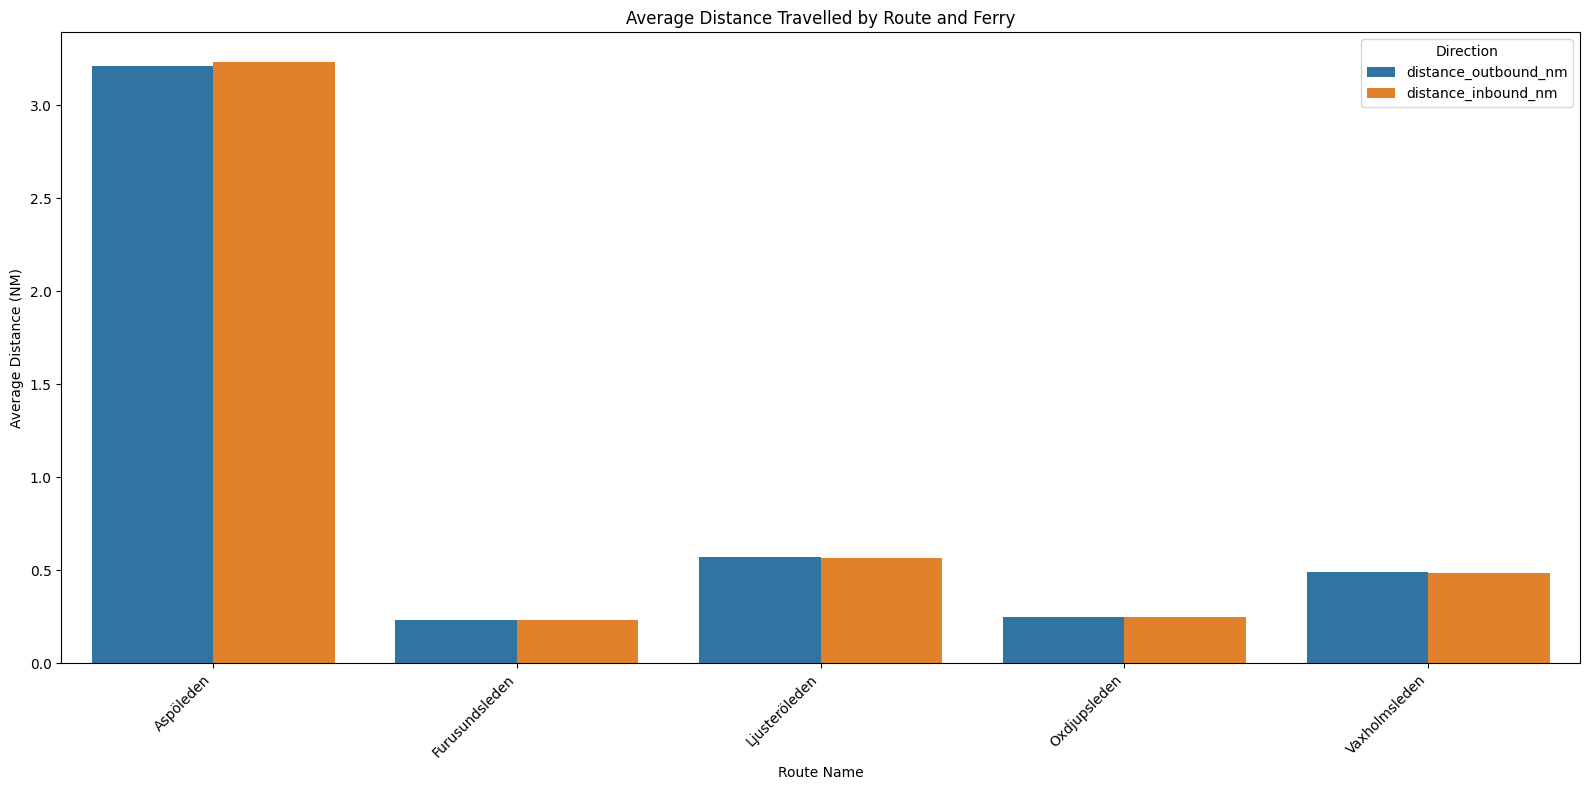

In [40]:
def distance_travelled_analysis(df):
    distance_data = df[['route_name', 'ferry_name', 'distance_outbound_nm', 'distance_inbound_nm']].copy() # Added .copy() to avoid SettingWithCopyWarning

    # Drop null values
    distance_data = distance_data.dropna()

    # Calculate the average distance for each leg (outbound and inbound)
    distance_by_route_ferry = distance_data.groupby(['route_name', 'ferry_name'])[['distance_outbound_nm', 'distance_inbound_nm']].mean().reset_index()

    # Calculate the overall average distance for each route and ferry
    distance_by_route_ferry['average_distance_nm'] = (distance_by_route_ferry['distance_outbound_nm'] + distance_by_route_ferry['distance_inbound_nm']) / 2

    # Group by route_name and calculate the mean of the overall average distance
    average_distance_by_route = distance_by_route_ferry.groupby('route_name')['average_distance_nm'].mean().reset_index()

    # Find the route with the highest average distance
    route_with_highest_distance = average_distance_by_route.loc[average_distance_by_route['average_distance_nm'].idxmax()]

    print(f"The route with the highest average distance travelled is: {route_with_highest_distance['route_name']} with an average distance of {route_with_highest_distance['average_distance_nm']:.2f} NM.")

    distance_by_route_ferry_melted = distance_by_route_ferry.melt(
        id_vars=['route_name', 'ferry_name'],
        value_vars=['distance_outbound_nm', 'distance_inbound_nm'],
        var_name='direction',
        value_name='average_distance_nm_leg' # Renamed to avoid confusion
    )
    print("Relevant context")
    print(distance_by_route_ferry_melted.head(10))
    plt.figure(figsize=(16, 8))
    sns.barplot(
        data=distance_by_route_ferry_melted,
        x='route_name',
        y='average_distance_nm_leg',
        hue='direction'
    )
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Distance Travelled by Route and Ferry')
    plt.xlabel('Route Name')
    plt.ylabel('Average Distance (NM)')
    plt.legend(title='Direction')
    plt.tight_layout()
    plt.show()

# Call the function
print("Correct answer")
distance_travelled_analysis(ferry_data)

## Q6 What is the average distance travelled on Ljusteröleden?

In [41]:
def average_distance_on_ljusteroleden(df):
    ljusteroleden_data = df[df['route_name'] == 'Ljusteröleden'].copy()

    if not ljusteroleden_data.empty:
        # Calculate the average distance for each trip on Ljusteröleden
        ljusteroleden_data['average_trip_distance_nm'] = (
            ljusteroleden_data['distance_outbound_nm'] + ljusteroleden_data['distance_inbound_nm']
        ) / 2

        # Calculate the overall average distance for Ljusteröleden
        average_distance = ljusteroleden_data['average_trip_distance_nm'].mean()

        print(f"The average distance travelled on Ljusteröleden is: {average_distance:.2f} NM.")
    else:
        print("Data for Ljusteröleden not found in the provided DataFrame.")


In [42]:
average_distance_on_ljusteroleden(ferry_data)

The average distance travelled on Ljusteröleden is: 0.57 NM.


## Q7 What is the peak hour for route X? What is Maximum Passenger Car Equivalent (PCE) during that hour? / How many passangers use ferry X during peak hour? 

In [43]:
import pandas as pd

# Assume demand_analysis function remains the same as you provided:
def demand_analysis(df):
    # Ensure the time_departure column is datetime type and extract the hour
    # Making a copy to avoid SettingWithCopyWarning if ferry_data is used elsewhere
    df = df.copy()
    df['time_departure'] = pd.to_datetime(df['time_departure'], errors='coerce') # Add errors='coerce' for robustness
    df.dropna(subset=['time_departure'], inplace=True) # Drop rows where conversion failed
    df['hour'] = df['time_departure'].dt.hour

    # Aggregate data by 'route_name', 'ferry_name', and 'hour'
    demand_by_hour_route = df.groupby(['route_name', 'ferry_name', 'hour']).agg(
        # Use 'size' to count the number of departures per hour if needed
        departures = ('time_departure', 'size'),
        cars_outbound = ('cars_outbound', 'sum'),
        trucks_outbound = ('trucks_outbound', 'sum'),
        trucks_with_trailer_outbound = ('trucks_with_trailer_outbound', 'sum'),
        passenger_car_equivalent_outbound = ('passenger_car_equivalent_outbound', 'sum'),
        passenger_car_equivalent_inbound = ('passenger_car_equivalent_inbound', 'sum')
    ).reset_index()
    return demand_by_hour_route

def find_peak_hour_demand(df, route_name, peak_start_hour=7, peak_end_hour=9):
    """
    Identifies the hour with the highest outbound demand (measured by PCE)
    on a specific route during peak hours.

    Args:
        df (pd.DataFrame): DataFrame containing aggregated hourly ferry demand data,
                           output of demand_analysis.
        route_name (str): The name of the route to analyze.
        peak_start_hour (int): The starting hour of the morning peak (inclusive).
        peak_end_hour (int): The ending hour of the morning peak (inclusive).

    Returns:
        tuple: A tuple containing (peak_hour, max_pce_outbound),
               or (None, None) if no data is found for the specified criteria.
    """
    # Filter for the specific route and morning peak hours
    morning_peak_data = df[
        (df['route_name'] == route_name) &
        (df['hour'] >= peak_start_hour) &
        (df['hour'] <= peak_end_hour)
    ].copy() # Use .copy() to avoid potential SettingWithCopyWarning

    if morning_peak_data.empty:
        print(f"No data found for route '{route_name}' during hours {peak_start_hour}-{peak_end_hour}.")
        return None, None

    # Since data is already aggregated by hour (and potentially ferry, though maybe only one),
    # find the row with the maximum outbound PCE within the filtered set.
    # idxmax() returns the index of the first occurrence of the maximum value.
    idx_max_pce = morning_peak_data['passenger_car_equivalent_outbound'].idxmax()

    # Get the corresponding row
    peak_hour_data = morning_peak_data.loc[idx_max_pce]

    peak_hour = peak_hour_data['hour']
    max_pce_outbound = peak_hour_data['passenger_car_equivalent_outbound']

    # Optional: You could also return truck demand for that specific hour
    # trucks_at_peak = peak_hour_data['trucks_outbound']

    return peak_hour, max_pce_outbound


# Analyze the demand data
demand_data_processed = demand_analysis(ferry_data)
print("Processed Demand Data:")
print(demand_data_processed)
print("-" * 30)

# Specify the route you want to analyze
selected_route = 'Aspöleden'
start_hour = 6
end_hour = 23

# Find the hour with the highest demand during morning peak hours
peak_hour, max_pce = find_peak_hour_demand(demand_data_processed, selected_route, start_hour, end_hour)

if peak_hour is not None:
    print(f"For the route '{selected_route}', the peak hour between ({start_hour}:00-{end_hour}:59) with the highest outbound demand is:")
    print(f"Hour: {peak_hour}:00 - {peak_hour}:59")
    print(f"Maximum Passenger Car Equivalent (PCE) during that hour: {max_pce}")
else:
    print(f"Could not determine the peak hour for route '{selected_route}' during the specified times.")

Processed Demand Data:
        route_name ferry_name  hour  departures  cars_outbound  \
0        Aspöleden      Yxlan     0           2             17   
1        Aspöleden      Yxlan     3           1              8   
2        Aspöleden      Yxlan     5         356            481   
3        Aspöleden      Yxlan     6         251           1195   
4        Aspöleden      Yxlan     7         351           2832   
..             ...        ...   ...         ...            ...   
107  Vaxholmsleden       Nina    19         888          18727   
108  Vaxholmsleden       Nina    20         668          11462   
109  Vaxholmsleden       Nina    21         672           9374   
110  Vaxholmsleden       Nina    22         676           6424   
111  Vaxholmsleden       Nina    23         677           3700   

     trucks_outbound  trucks_with_trailer_outbound  \
0                  3                             0   
1                  1                             0   
2                 17  

## Q8 What is the average fuel consumption on the route Ljusterö to Östanå? 

In [44]:
def fuel_consumption_analysis(df):
    """Calculate average fuel consumption for Ljusteröleden route."""
    ljusteroleden_data = df[df['route_name'] == 'Ljusteröleden'].copy()

    if not ljusteroleden_data.empty:
        # Select fuel consumption columns and drop rows with missing values
        consumption_data = ljusteroleden_data[['fuelcons_outbound_l', 'fuelcons_inbound_l']].dropna()
        
        if not consumption_data.empty:
            # Calculate average fuel consumption per direction
            average_outbound = consumption_data['fuelcons_outbound_l'].mean()
            average_inbound = consumption_data['fuelcons_inbound_l'].mean()
            
            # Calculate overall average
            average_consumption = (average_outbound + average_inbound) / 2
            
            print(f"The average fuel consumption on Ljusteröleden is: {average_consumption:.2f} liters")
            print(f"  - Average outbound: {average_outbound:.2f} liters")
            print(f"  - Average inbound: {average_inbound:.2f} liters")
        else:
            print("No valid fuel consumption data found for Ljusteröleden")
    else:
        print("Data for Ljusteröleden not found in the provided DataFrame")

# Call the function with your ferry_data
fuel_consumption_analysis(ferry_data)

The average fuel consumption on Ljusteröleden is: 6.99 liters
  - Average outbound: 7.00 liters
  - Average inbound: 6.98 liters


# Q9: What is the average trip duration for each route? 

In [45]:
def analyze_trip_duration(df):
    """
    Calculate average trip duration for each route using start and end times.
    """
    # Create a copy to avoid modifying original data
    trip_data = df.copy()
    
    # Convert time columns to datetime if they aren't already
    trip_data['start_time_outbound'] = pd.to_datetime(trip_data['start_time_outbound'])
    trip_data['end_time_outbound'] = pd.to_datetime(trip_data['end_time_outbound'])
    trip_data['start_time_inbound'] = pd.to_datetime(trip_data['start_time_inbound'])
    trip_data['end_time_inbound'] = pd.to_datetime(trip_data['end_time_inbound'])
    
    # Calculate duration for outbound and inbound trips
    trip_data['outbound_duration'] = (trip_data['end_time_outbound'] - 
                                    trip_data['start_time_outbound']).dt.total_seconds() / 60
    trip_data['inbound_duration'] = (trip_data['end_time_inbound'] - 
                                   trip_data['start_time_inbound']).dt.total_seconds() / 60
    
    # Group by route and calculate average durations
    route_durations = trip_data.groupby('route_name').agg({
        'outbound_duration': 'mean',
        'inbound_duration': 'mean'
    }).round(2)
    
    # Add total average duration
    route_durations['average_duration'] = ((route_durations['outbound_duration'] + 
                                          route_durations['inbound_duration']) / 2).round(2)
    
    print("Average Trip Durations (in minutes):")
    print(route_durations)
    
    return route_durations

# Call the function
trip_durations = analyze_trip_duration(ferry_data)
trip_durations

Average Trip Durations (in minutes):
                outbound_duration  inbound_duration  average_duration
route_name                                                           
Aspöleden                   25.17             24.80             24.98
Furusundsleden               3.19              3.28              3.24
Ljusteröleden                5.56              5.49              5.52
Oxdjupsleden                 3.16              3.09              3.12
Vaxholmsleden                5.26              5.28              5.27


,outbound_duration,inbound_duration,average_duration
route_name,,,
Aspöleden,25.17,24.80,24.98
Furusundsleden,3.19,3.28,3.24
Ljusteröleden,5.56,5.49,5.52
Oxdjupsleden,3.16,3.09,3.12
Vaxholmsleden,5.26,5.28,5.27



# Q10: Which ferry has the best fuel efficiency (liters per nautical mile)?

In [46]:
def analyze_fuel_efficiency(df):
    """
    Calculate fuel efficiency (liters per nautical mile) for each ferry.
    """
    # Create a copy to avoid modifying original data
    efficiency_data = df.copy()
    
    # Select relevant columns and drop rows with missing values
    efficiency_data = efficiency_data[[
        'ferry_name',
        'fuelcons_outbound_l',
        'fuelcons_inbound_l',
        'distance_outbound_nm',
        'distance_inbound_nm'
    ]].dropna()
    
    if efficiency_data.empty:
        print("No valid data found for fuel efficiency analysis")
        return None
    
    # Calculate total fuel consumption and distance for each ferry
    ferry_efficiency = efficiency_data.groupby('ferry_name').agg({
        'fuelcons_outbound_l': 'sum',
        'fuelcons_inbound_l': 'sum',
        'distance_outbound_nm': 'sum',
        'distance_inbound_nm': 'sum'
    })
    
    # Calculate total fuel consumption and distance
    ferry_efficiency['total_fuel_l'] = (ferry_efficiency['fuelcons_outbound_l'] + 
                                       ferry_efficiency['fuelcons_inbound_l'])
    ferry_efficiency['total_distance_nm'] = (ferry_efficiency['distance_outbound_nm'] + 
                                           ferry_efficiency['distance_inbound_nm'])
    
    # Calculate fuel efficiency (liters per nautical mile)
    ferry_efficiency['efficiency_l_per_nm'] = (ferry_efficiency['total_fuel_l'] / 
                                             ferry_efficiency['total_distance_nm'])
    
    # Sort by efficiency (ascending order - lower is better)
    ferry_efficiency = ferry_efficiency.sort_values('efficiency_l_per_nm')
    
    # Print results
    print("\nFuel Efficiency Analysis (liters per nautical mile):")
    print("Lower values indicate better fuel efficiency")
    print("-" * 50)
    for ferry, row in ferry_efficiency.iterrows():
        print(f"{ferry}: {row['efficiency_l_per_nm']:.2f} L/NM")
    
    # Print the most efficient ferry
    most_efficient = ferry_efficiency.index[0]
    print("\nMost fuel-efficient ferry:")
    print(f"{most_efficient}: {ferry_efficiency['efficiency_l_per_nm'].iloc[0]:.2f} L/NM")
    
    return ferry_efficiency

# Call the function
ferry_efficiency = analyze_fuel_efficiency(ferry_data)
ferry_efficiency


Fuel Efficiency Analysis (liters per nautical mile):
Lower values indicate better fuel efficiency
--------------------------------------------------
Merkurius: 6.08 L/NM
Nina: 8.37 L/NM
Yxlan: 10.82 L/NM
Fragancia: 11.92 L/NM
Jupiter: 12.30 L/NM

Most fuel-efficient ferry:
Merkurius: 6.08 L/NM


,fuelcons_outbound_l,fuelcons_inbound_l,distance_outbound_nm,distance_inbound_nm,total_fuel_l,total_distance_nm,efficiency_l_per_nm
ferry_name,,,,,,,
Merkurius,17880.423763,17314.818777,2899.462350,2891.781483,35195.242540,5791.243833,6.077320
Nina,53169.578354,55156.199296,6472.819247,6464.316549,108325.777651,12937.135796,8.373243
Yxlan,146443.963241,139826.624258,13195.973712,13272.036802,286270.587499,26468.010514,10.815720
Fragancia,30204.748299,29882.932492,2534.557199,2504.573627,60087.680792,5039.130825,11.924215
Jupiter,18131.684404,18103.296745,1476.017860,1469.975420,36234.981149,2945.993280,12.299750



# Q11: What is the most underutilized route in the dataset? What is the average amount of vehicles taking the ferry on Aspöleden? What is the utilization percentage of route X? 


In [47]:
def analyze_route_utilization(df):
    """
    Analyze route utilization by comparing actual vehicle load to capacity.
    This helps identify which routes are most underutilized in terms of actual vehicle load.
    """
    # Create a copy to avoid modifying original data
    utilization_data = df.copy()
    
    # Calculate total vehicles per trip (both directions)
    utilization_data['total_vehicles_outbound'] = (
        utilization_data['cars_outbound'] + 
        utilization_data['trucks_outbound'] + 
        utilization_data['trucks_with_trailer_outbound'] +
        utilization_data['motorcycles_outbound'] +
        utilization_data['buses_outbound']
    )
    
    utilization_data['total_vehicles_inbound'] = (
        utilization_data['cars_inbound'] + 
        utilization_data['trucks_inbound'] + 
        utilization_data['trucks_with_trailer_inbound'] +
        utilization_data['motorcycles_inbound'] +
        utilization_data['buses_inbound']
    )
    
    # Group by route and calculate average vehicle load
    route_stats = utilization_data.groupby('route_name').agg({
        'total_vehicles_outbound': 'mean',
        'total_vehicles_inbound': 'mean',
        'ferry_name': 'count'  # Number of trips
    }).rename(columns={'ferry_name': 'trip_count'})
    
    # Calculate average vehicles per trip (both directions)
    route_stats['avg_vehicles_per_trip'] = (
        (route_stats['total_vehicles_outbound'] + route_stats['total_vehicles_inbound']) / 2
    ).round(2)
    
    # Find the route with highest average vehicles (assumed to be closest to capacity)
    max_vehicles = route_stats['avg_vehicles_per_trip'].max()
    
    # Calculate utilization percentage relative to the most utilized route
    route_stats['utilization_percentage'] = (
        (route_stats['avg_vehicles_per_trip'] / max_vehicles) * 100
    ).round(2)
    
    # Sort by utilization percentage (ascending to show most underutilized first)
    route_stats = route_stats.sort_values('utilization_percentage')
    
    # Print results
    print("\nRoute Utilization Analysis:")
    print("Lower percentages indicate more underutilized routes")
    print("-" * 60)
    
    for route, row in route_stats.iterrows():
        print(f"\n{route}:")
        print(f"  - Average vehicles per trip: {row['avg_vehicles_per_trip']}")
        print(f"  - Utilization percentage: {row['utilization_percentage']:.2f}%")
        print(f"  - Number of trips analyzed: {row['trip_count']}")
    
    # Identify the most underutilized route
    most_underutilized = route_stats.index[0]
    print(f"\nMost underutilized route: {most_underutilized}")
    print(f"Average vehicles per trip: {route_stats['avg_vehicles_per_trip'].iloc[0]}")
    print(f"Utilization percentage: {route_stats['utilization_percentage'].iloc[0]:.2f}%")
    
    return route_stats

# Call the function
route_utilization = analyze_route_utilization(ferry_data)
route_utilization


Route Utilization Analysis:
Lower percentages indicate more underutilized routes
------------------------------------------------------------

Oxdjupsleden:
  - Average vehicles per trip: 9.31
  - Utilization percentage: 49.68%
  - Number of trips analyzed: 17505.0

Aspöleden:
  - Average vehicles per trip: 13.0
  - Utilization percentage: 69.37%
  - Number of trips analyzed: 5514.0

Furusundsleden:
  - Average vehicles per trip: 14.41
  - Utilization percentage: 76.89%
  - Number of trips analyzed: 15542.0

Vaxholmsleden:
  - Average vehicles per trip: 16.24
  - Utilization percentage: 86.66%
  - Number of trips analyzed: 17517.0

Ljusteröleden:
  - Average vehicles per trip: 18.74
  - Utilization percentage: 100.00%
  - Number of trips analyzed: 13280.0

Most underutilized route: Oxdjupsleden
Average vehicles per trip: 9.31
Utilization percentage: 49.68%


,total_vehicles_outbound,total_vehicles_inbound,trip_count,avg_vehicles_per_trip,utilization_percentage
route_name,,,,,
Oxdjupsleden,9.349272,9.261697,17505,9.31,49.68
Aspöleden,13.170294,12.830432,5514,13.00,69.37
Furusundsleden,14.239094,14.590143,15542,14.41,76.89
Vaxholmsleden,15.971171,16.500999,17517,16.24,86.66
Ljusteröleden,19.145407,18.342395,13280,18.74,100.00


# Q12: What's the average number of vehicles left at terminals in month X in terminal X? 

In [49]:
import pandas as pd

def average_vehicles_left_per_month(df):
    """
    Calculates the average number of vehicles left at terminals per month.

    Args:
        df: pandas DataFrame containing ferry terminal data.
            It should have columns 'terminal_departure' (string), 'terminal_arrival' (string),
            'time_departure' (string), 'cars_outbound' (numeric), 'trucks_outbound' (numeric),
            and 'trucks_with_trailer_outbound' (numeric).

    Returns:
        pandas DataFrame: A DataFrame with columns 'month' (string), 'terminal' (string),
                           and 'average_vehicles_left' (float),
                           or an empty DataFrame if there are no data.
    """

    # 1. Calculate Total Vehicles (Assuming this is what "vehicles left" refers to)
    df['total_vehicles_outbound'] = df['cars_outbound'].fillna(0) + df['trucks_outbound'].fillna(0) + df['trucks_with_trailer_outbound'].fillna(0)

    # 2. Extract Month from 'time_departure'
    if 'time_departure' not in df.columns:
        print("Error: 'time_departure' column not found in DataFrame.")
        return pd.DataFrame()  # Return an empty DataFrame

    df['month'] = pd.to_datetime(df['time_departure']).dt.strftime('%Y-%m')

    # 3. Determine "Terminal" (Combining Departure and Arrival)
    # You might need to adjust this logic based on your specific definition of "at terminals"
    df['terminal'] = df['terminal_departure']  # Or use terminal_arrival, or combine them

    # 4. Group by Terminal and Month, Calculate Average
    average_vehicles = df.groupby(['terminal', 'month'])['total_vehicles_outbound'].mean()

    # 5. Present Results (Optional - for more readable output)
    average_vehicles_df = average_vehicles.reset_index()  # Convert Series to DataFrame

    return average_vehicles_df



average_vehicles_per_month = average_vehicles_left_per_month(ferry_data)

if not average_vehicles_per_month.empty:
    print("Average Vehicles Left at Terminals Per Month:")
    print(average_vehicles_per_month)
else:
    print("No data to calculate average vehicles left.")

Average Vehicles Left at Terminals Per Month:
                                             terminal    month  \
0   Furusund                                      ...  2023-03   
1   Furusund                                      ...  2023-04   
2   Furusund                                      ...  2023-05   
3   Furusund                                      ...  2023-06   
4   Furusund                                      ...  2023-07   
5   Furusund                                      ...  2023-08   
6   Furusund                                      ...  2023-09   
7   Furusund                                      ...  2023-10   
8   Furusund                                      ...  2023-11   
9   Furusund                                      ...  2023-12   
10  Furusund                                      ...  2024-01   
11  Furusund                                      ...  2024-02   
12  Karlskrona                                    ...  2023-03   
13  Karlskrona                

# Q13: Which route has the highest vehicle throughput per day?

In [51]:
def highest_vehicle_throughput_per_day(df):
    """
    Determines the route with the highest vehicle throughput per day.

    Args:
        df: pandas DataFrame containing ferry operation data.
            It should have columns 'route_name' (string), 'time_departure' (string),
            'cars_outbound' (numeric), 'trucks_outbound' (numeric),
            and 'trucks_with_trailer_outbound' (numeric).

    Returns:
        pandas DataFrame: A DataFrame with the route name and its corresponding
                          highest daily vehicle throughput,
                          or an empty DataFrame if there are no data.
    """

    # 1. Calculate Total Vehicles
    df['total_vehicles'] = df['cars_outbound'].fillna(0) + df['trucks_outbound'].fillna(0) + df['trucks_with_trailer_outbound'].fillna(0)

    # 2. Extract Date from 'time_departure'
    if 'time_departure' not in df.columns:
        print("Error: 'time_departure' column not found in DataFrame.")
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['time_departure']).dt.date

    # 3. Calculate Daily Vehicle Throughput for Each Route
    daily_throughput = df.groupby(['route_name', 'date'])['total_vehicles'].sum().reset_index()

    # 4. Find the Highest Daily Throughput for Each Route
    highest_daily_throughput = daily_throughput.groupby('route_name')['total_vehicles'].max().reset_index()

    # 5. Rename the 'total_vehicles' column for clarity
    highest_daily_throughput = highest_daily_throughput.rename(columns={'total_vehicles': 'highest_daily_throughput'})

    # 6. Optional: Find the route(s) with the overall maximum throughput
    overall_max_throughput = highest_daily_throughput['highest_daily_throughput'].max()
    routes_with_overall_max = highest_daily_throughput[highest_daily_throughput['highest_daily_throughput'] == overall_max_throughput]

    print("Route(s) with the overall highest daily throughput:")
    print(routes_with_overall_max)

    return highest_daily_throughput

highest_vehicle_throughput_per_day = highest_vehicle_throughput_per_day(ferry_data)
print(highest_vehicle_throughput_per_day)

Route(s) with the overall highest daily throughput:
      route_name  highest_daily_throughput
2  Ljusteröleden                      1840
       route_name  highest_daily_throughput
0       Aspöleden                       351
1  Furusundsleden                      1794
2   Ljusteröleden                      1840
3    Oxdjupsleden                       841
4   Vaxholmsleden                      1387



# Q14: What's the busiest day of the week for each route?


# Q15: How does the passenger car equivalent (PCE) vary throughout the day? What is max / min for each route


# Q16: What's the correlation between vehicle load and fuel consumption?


# Q17: What's the average capacity utilization rate per route?
# Q18: When do routes reach peak capacity most frequently?
# Q19: How often are vehicles left at terminals during peak hours?
# Q20: What's the optimal vehicle mix for fuel efficiency?